In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import random

In [55]:
#Row
vmin = 1
vmax = 5
rowcount = 100

#Column
tpl_colname = [f"skill-{letter}" for letter in list(string.ascii_uppercase)]
colcount = len(tpl_colname)

data = np.random.randint(vmin, vmax+1, (rowcount, colcount))
df = pd.DataFrame(data, columns=tpl_colname)

df


,skill-A,skill-B,skill-C,skill-D,skill-E,skill-F,skill-G,skill-H,skill-I,skill-J,...,skill-Q,skill-R,skill-S,skill-T,skill-U,skill-V,skill-W,skill-X,skill-Y,skill-Z
0,5,4,5,5,5,3,5,2,4,2,...,4,1,5,3,2,3,1,4,3,5
1,1,4,2,1,4,4,2,1,3,2,...,3,5,3,5,5,5,4,3,3,2
2,4,4,2,3,4,5,5,5,2,3,...,5,1,5,3,2,1,4,2,5,5
3,1,1,1,2,5,1,4,4,5,4,...,5,3,5,3,2,4,5,2,4,1
4,1,2,1,2,5,4,4,5,2,5,...,2,2,1,4,3,5,1,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,3,1,4,1,5,3,2,1,2,...,2,5,4,1,5,4,5,5,1,1
96,2,1,5,5,4,2,5,2,5,2,...,1,5,1,3,4,4,1,1,1,4
97,1,5,5,2,5,3,4,3,2,5,...,5,2,5,3,4,3,5,5,2,1
98,1,4,2,2,3,2,1,3,3,2,...,1,5,1,5,3,3,3,4,4,3


In [56]:
#Dimensionality Reduction with SVD
#2-D
from sklearn.decomposition import TruncatedSVD

model_svd = TruncatedSVD(n_components=2)
vecs_list = model_svd.fit_transform(df)
vecs_list

array([[16.77561092,  0.7990654 ],
       [16.59967285, -2.56343651],
       [17.61709704, -0.94884926],
       [15.58540611,  3.31304298],
       [15.96865391,  2.10531021],
       [15.69350601, -1.3218147 ],
       [14.77785638, -0.91089778],
       [14.74342543, -2.67502529],
       [14.3259684 ,  4.83729478],
       [14.99437062, -2.34687416],
       [17.05695266, -3.60392536],
       [13.65448382,  1.4989915 ],
       [16.65550387,  2.31056071],
       [15.03435039,  0.6219228 ],
       [12.60639497, -3.61432959],
       [14.52059868,  1.51070617],
       [17.22484496, -0.31178206],
       [14.5708322 ,  1.19071866],
       [15.67670655, -1.91720429],
       [16.17101051, -0.47046966],
       [16.58136944, -0.11385657],
       [15.4785434 ,  0.65858406],
       [14.39750023,  1.74136704],
       [16.18392168, -0.84926531],
       [13.59691895,  2.30674236],
       [15.34089932, -1.6212427 ],
       [14.10940637,  1.38406207],
       [15.91100619,  3.92982454],
       [14.96633006,

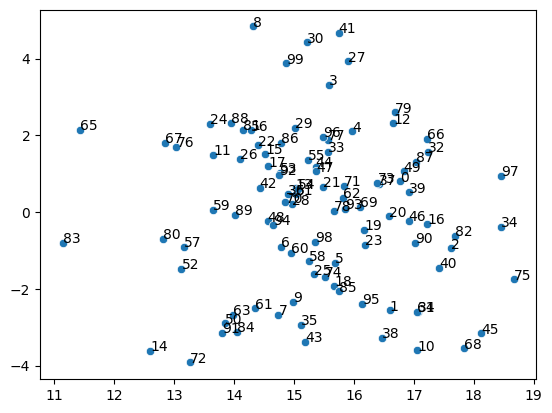

In [57]:
X = vecs_list[:,0]
Y = vecs_list[:,1]
sns.scatterplot(x=X, y=Y)

for i,(annot_x, annot_y) in enumerate(zip(X,Y)):
  plt.annotate(df.index[i], (annot_x, annot_y))

In [60]:
print(f'idx75: {df.loc[75].mean()}')
print(f'idx83: {df.loc[83].mean()}')

print(f'idx41: {df.loc[41].mean()}')
print(f'idx72: {df.loc[72].mean()}')

idx75: 3.6538461538461537
idx83: 2.1923076923076925
idx41: 3.076923076923077
idx72: 2.6153846153846154


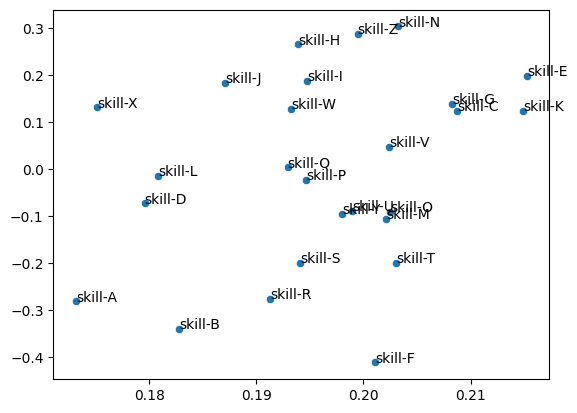

In [61]:
X_comp, Y_comp = model_svd.components_

sns.scatterplot(x=X_comp, y=Y_comp)

for i,(annot_x, annot_y) in enumerate(zip(X_comp,Y_comp)):
  plt.annotate(df.columns[i], (annot_x, annot_y))

In [62]:
df.loc[75]

skill-A    3
skill-B    5
skill-C    4
skill-D    3
skill-E    4
skill-F    4
skill-G    3
skill-H    3
skill-I    4
skill-J    5
skill-K    5
skill-L    3
skill-M    5
skill-N    2
skill-O    5
skill-P    5
skill-Q    4
skill-R    5
skill-S    3
skill-T    4
skill-U    2
skill-V    3
skill-W    3
skill-X    2
skill-Y    3
skill-Z    3
Name: 75, dtype: int64

In [63]:
#寄与度
model_svd.explained_variance_ratio_
#出力されたX軸/Y軸の足し算からどれくらいデータが残っているのか

array([0.04213118, 0.08038057])